# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Rahmad Ramadhan Laska
- Email: ramadhanlaska11@gmail.com
- Id Dicoding: rmdlaska11

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 :
Apakah permintaan sewa sepeda lebih tinggi selama hari kerja atau akhir pekan?

- pertanyaan 2 :
Siapakah kelompok pengguna yang paling banyak memanfaatkan layanan penyewaan sepeda?

## Menyiapkan semua library yang dibutuhkan

In [2]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [59]:
# Menghubungkan collab ke drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####Memuat Tabel Day

In [60]:
day = pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset/day.csv')
print(day.shape)
day.head()

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


####Memuat Tabel Hour

In [6]:
hour = pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset/hour.csv')
print(hour.shape)
hour.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

####Menilai Data hour

In [7]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [17]:
print("Jumlah duplikasi: ", hour.duplicated().sum())

Jumlah duplikasi:  0


In [18]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


####Menilai Data day

In [19]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [20]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [21]:
print("Jumlah data duplikat: ", day.duplicated().sum())

Jumlah data duplikat:  0


In [22]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [25]:
# Mengubah format dteday menjadi datetime
day['dteday'] = pd.to_datetime(day['dteday'])
hour['dteday'] = pd.to_datetime(hour['dteday'])

### Cleaning Data
Karena data tidak memiliki missing value maka tidak dilakukan cleaning

## Exploratory Data Analysis (EDA)

####Explor Data hour

In [23]:
hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [41]:
hourly_rentals_statistics = hour.groupby(by="hr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})
hourly_rentals_statistics

instant  cnt                            
   nunique  max min        mean         std
hr                                         
0      726  283   2   53.898072   42.307910
1      724  168   1   33.375691   33.538727
2      715  132   1   22.869930   26.578642
3      697   79   1   11.727403   13.239190
4      697   28   1    6.352941    4.143818
5      717   66   1   19.889819   13.200765
6      725  213   1   76.044138   55.084348
7      727  596   1  212.064649  161.441936
8      727  839   5  359.011004  235.189285
9      727  426  14  219.309491   93.703458
10     727  539   8  173.668501  102.205413
11     727  663  10  208.143054  127.495536
12     728  776   3  253.315934  145.081134
13     729  760  11  253.661180  148.107657
14     729  750  12  240.949246  147.271574
15     729  750   7  251.233196  144.632541
16     730  783  11  311.983562  148.682618
17     730  976  15  461.452055  232.656611
18     728  977  23  425.510989  224.639304
19     728  743  11  311.523352  161.050359
20     728  567  11  226.030220  119.670164
21     728  584   6  172.314560   89.788893
22     728  502   9  131.335165   69.937782
23     728  256   2   87.831044   50.846889

In [42]:
season_counts = hour.groupby('season')['cnt'].sum()
print(season_counts)

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64


In [43]:
year_counts = hour.groupby('yr')['cnt'].sum()
print(year_counts)

yr
0    1243103
1    2049576
Name: cnt, dtype: int64


####Explore Data day

In [26]:
day.describe(include="all")

<ipython-input-26-0f75e45f5a45>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [44]:
weather_counts = day.groupby('weathersit')['cnt'].sum()
print(weather_counts)

weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64


In [45]:
holiday_counts = day.groupby('holiday')['cnt'].sum()
workingday_counts = day.groupby('workingday')['cnt'].sum()
print("Total Bike Rentals on Holidays:\n", holiday_counts)
print("\nTotal Bike Rentals on Working Days:\n", workingday_counts)

Total Bike Rentals on Holidays:
 holiday
0    3214244
1      78435
Name: cnt, dtype: int64

Total Bike Rentals on Working Days:
 workingday
0    1000269
1    2292410
Name: cnt, dtype: int64


In [46]:
user_counts = day[['casual', 'registered']].sum()
print(user_counts)

casual         620017
registered    2672662
dtype: int64


In [47]:
combined_data = pd.merge(
    left=day,
    right=hour,
    how="left",
    left_on="dteday",
    right_on="dteday"
)

combined_data.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [58]:
combined_data.to_csv("main_data.csv")

## Visualization & Explanatory Analysis

### Pertanyaan 1:

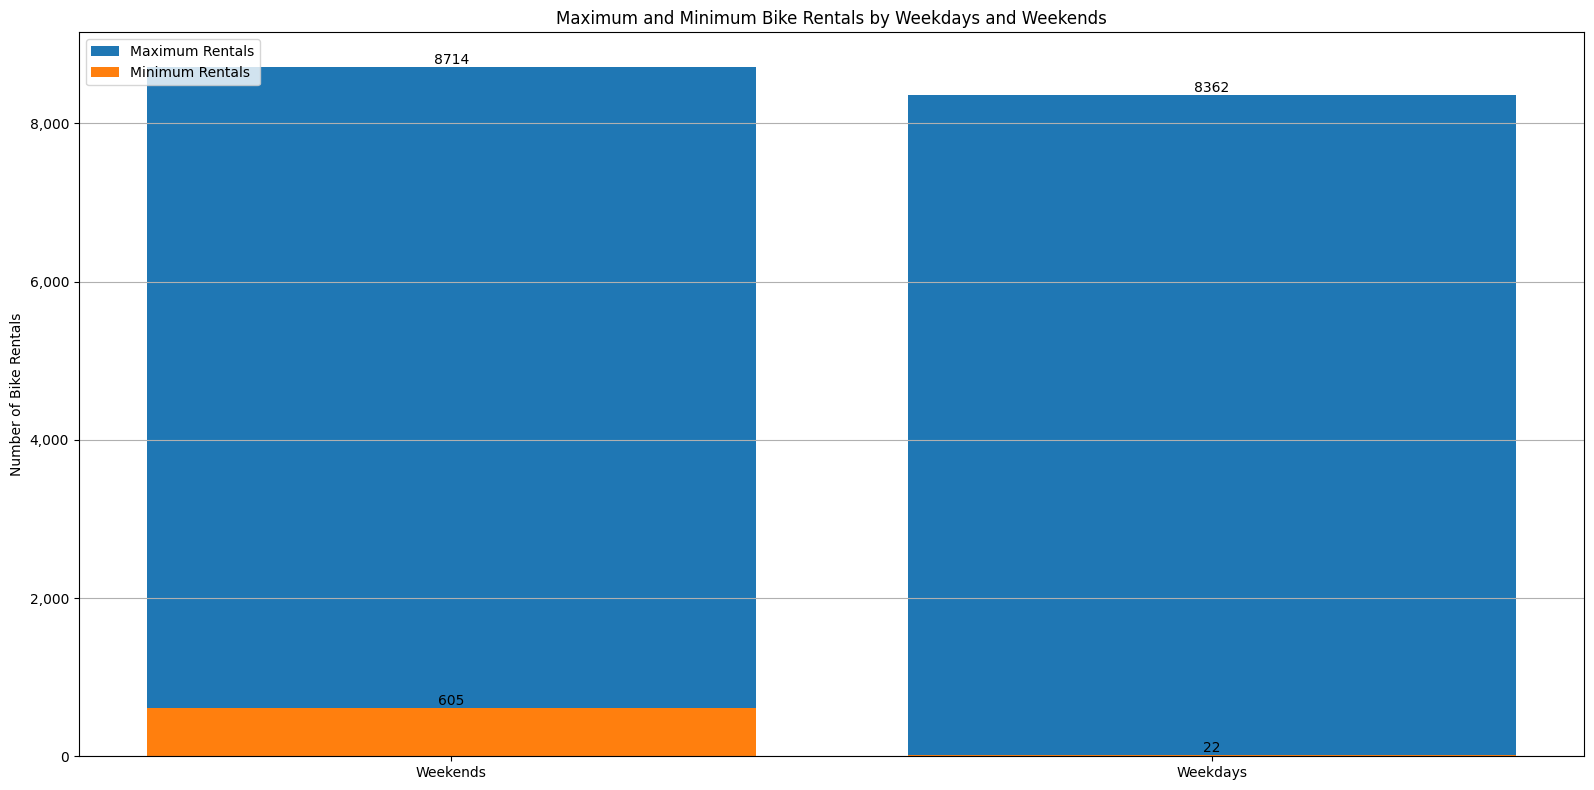

In [64]:
rentals_by_day_type = day.groupby("workingday").agg({
    "instant": "nunique",
    "cnt": ["max", "min"]
})
rentals_by_day_type = rentals_by_day_type.reset_index()

rentals_by_day_type["workingday"] = ["Weekends", "Weekdays"]

plt.figure(figsize=(16, 8))
plt.bar(rentals_by_day_type["workingday"],
        rentals_by_day_type[("cnt", "max")],
        label="Maximum Rentals")
plt.bar(rentals_by_day_type["workingday"],
        rentals_by_day_type[("cnt", "min")],
        label="Minimum Rentals")

for i in range(len(rentals_by_day_type["workingday"])):
    plt.text(i, rentals_by_day_type[("cnt", "max")][i],
             str(rentals_by_day_type[("cnt", "max")][i]),
             ha="center", va="bottom")
    plt.text(i, rentals_by_day_type[("cnt", "min")][i],
             str(rentals_by_day_type[("cnt", "min")][i]),
             ha="center", va="bottom")

plt.title("Maximum and Minimum Bike Rentals by Weekdays and Weekends")
plt.ylabel("Number of Bike Rentals")

plt.legend(loc="upper left")
plt.grid(axis="y")
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(
    plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}")
)
plt.show()


### Pertanyaan 2:

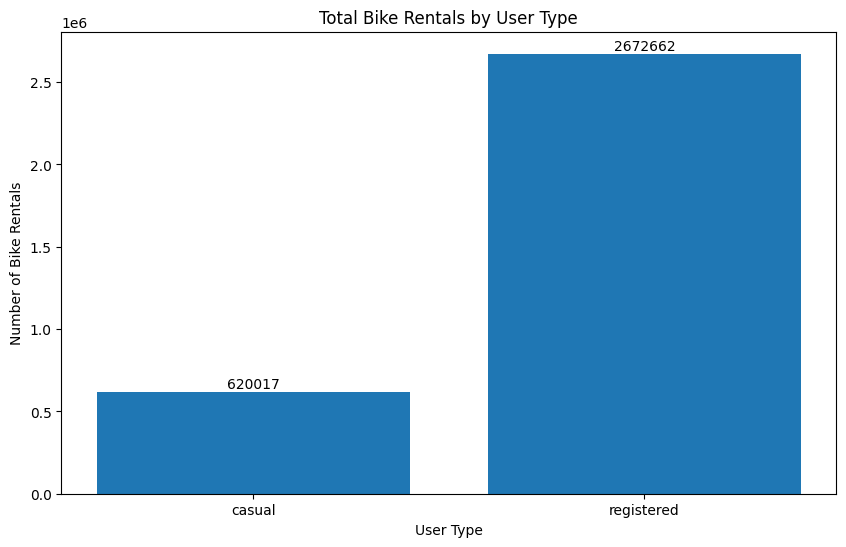

In [57]:
user_counts = day[['casual', 'registered']].sum()

plt.figure(figsize=(10, 6))
bars = plt.bar(user_counts.index, user_counts.values)
plt.title('Total Bike Rentals by User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Bike Rentals')

# Menambahkan label nilai pada setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.show()

## Conclusion

- Conclution pertanyaan 1: Jumlah sewa sepeda tertinggi terjadi pada akhir pekan, mencapai 8.714, sementara jumlah sewa terendah terjadi pada hari kerja, hanya sebesar 8.362.
- Conclution pertanyaan 2: Mayoritas pengguna adalah pengguna terdaftar, dengan total jumlah mencapai 2.672.662.